# 군집 : 클러스터링 (비지도학습)

### 군집

유사한 특징을 가지고 있는 집단을 어떻게 분류할 것인가?

분석 : 서로 유사한 특성을 가지는 군집 도출
- 유사도가 높은 데이터끼리 그룹화(유클리드거리식 이용)
- 계층형 클러스터링과 비계층형 클러스터링으로 분류

# 실습 1 : 키, 몸무게에 따른 체형 군집화

세 그룹으로 나눈다.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(5)

### 데이터 작성(준비)

In [6]:
# 키와 몸무게 작성

df = pd.DataFrame(columns=['height','weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [175,80]

In [7]:
df

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,175,80


### 데이터 시각화

 데이터를 2차원 그래프로 시각화한다.

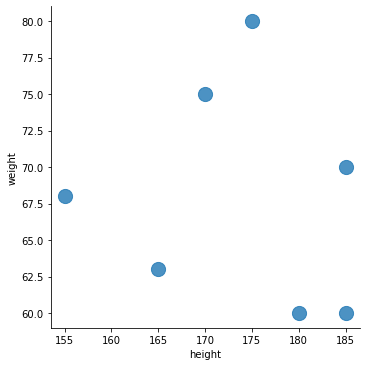

In [11]:
sns.lmplot('height','weight',
          data = df,
          fit_reg = False,
          scatter_kws = {'s':200})

## k-means 평균 군집화

In [13]:
data_points = df.values
kmeans = KMeans(n_clusters=3).fit(data_points)

### 다음 명령어로 각 군집의 중심위치를 확인할 수 있다.

In [15]:
kmeans.cluster_centers_

array([[160.        ,  65.5       ],
       [183.33333333,  63.33333333],
       [172.5       ,  77.5       ]])

데이터가 어느 군집에 소속되어 있는지 데이터프레임의 cluster_id 행에 저장한다.

In [16]:
df['cluster_id'] = kmeans.labels_

In [17]:
df

,height,weight,cluster_id
0,185,60,1
1,180,60,1
2,185,70,1
3,165,63,0
4,155,68,0
5,170,75,2
6,175,80,2


### K평균 군집시각화

키가 작은 그룹, 중간그룹, 큰 그룹으로 군집된 결과를 각각 다른색으로 구분하여 군집된 결과를 확인할 수 있다.

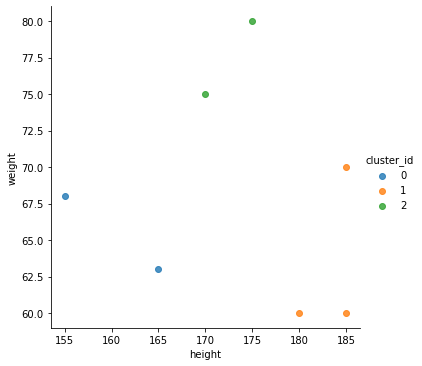

In [18]:
sns.lmplot(x='height', y ='weight',
          data = df, fit_reg = False,
          hue = 'cluster_id')

# 실습 2 : wholesale customers
UCI 저장소의 도매업 고객을 분류한다.

https://archive.ics.uci.edu/ml/machine-learning-databases

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# 도매업고객 데이터셋 가져오기

uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'

df = pd.read_csv(uci_path, header=0)
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


- Channel : 호텔/레스토랑, 소매점등의 판매채널을 의미
- Region : 고객 소재지

### 데이터 전처리

#### 데이터프레임 전체를 학습데이터로 사용한다.

- 비지도학습 모형에서는 예측변수를 지정할 필요가 없다.
- 필요한 속성을 모두 설명변수로 활용한다.
- StandardScaler() 함수를 이용하여 학습데이터를 정규화하면 모형학습을 위한 데이터의 모든 준비가 끝난다.
- 서로 다른 변수 사이에 객체가 포함될 수 있으므로 데이터 값의 상대적 크기 차이에서 발생하는 오류를 제거해준다. -> 정규화(0~1 사이의 값으로)

In [26]:
# 모든 데이터를 학습용으로 선언해준다.
X = df.iloc[:, :]

In [27]:
# 5행 정보만 확인한다.
X[:5]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### 설명변수 데이터를 정규화

In [28]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [31]:
X[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

## K-Means 모델링

In [32]:
from sklearn import cluster

In [35]:
kmeans = cluster.KMeans(init='k-means++',
                       n_clusters = 5,
                       n_init=10)

In [37]:
# 모델링, 실행때마다 예측값이 달라질 수 있음
kmeans.fit(X)

KMeans(n_clusters=5)

In [38]:
# 예측값 확인

cluster_label = kmeans.labels_

cluster_label

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 4, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 1, 3, 0, 1, 1, 0, 3, 0, 0, 1, 3,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 3, 3, 1,
       1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0,

In [40]:
# 예축결과를 데이터 프레임에 추가

df['cluster'] = cluster_label
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


### 시각화 : 산점도

- 모형은 8개의 속성(변수)을 이용하여 각 관측값을 5개의 클러스터로 구분하였다.

- Grocery : 식료품점
- Frozen : 냉동식품
- Milk : 유제품
- Delicassen : 조제식품

<AxesSubplot:xlabel='Milk', ylabel='Delicassen'>

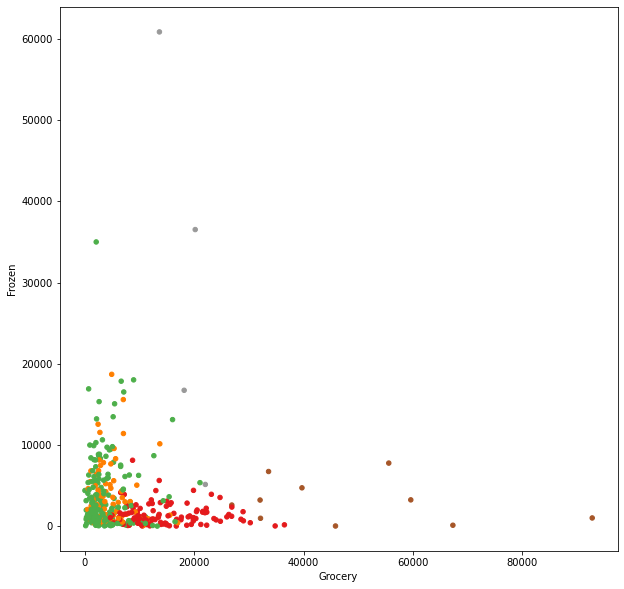

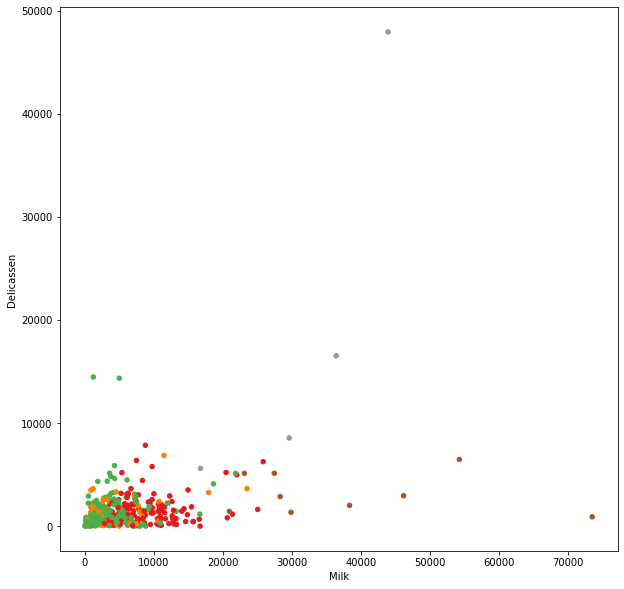

In [41]:
df.plot(kind='scatter', x = 'Grocery', y='Frozen',
       c = 'cluster', cmap = 'Set1',
       colorbar = False, figsize = (10,10))

df.plot(kind='scatter', x = 'Milk', y='Delicassen',
       c = 'cluster', cmap = 'Set1',
       colorbar = False, figsize = (10,10))

다른 값들에 비해 지나치게 큰값을 구성되는 클러스터에 속하는 값들을 제거하고 다시 그린다.

In [46]:
# 큰 값들으로 구성된 클러스터(0,4)를 제외한다.

mask = (df['cluster'] == 0) | (df['cluster'] == 4)

ndf = df[~mask]

<AxesSubplot:xlabel='Milk', ylabel='Delicassen'>

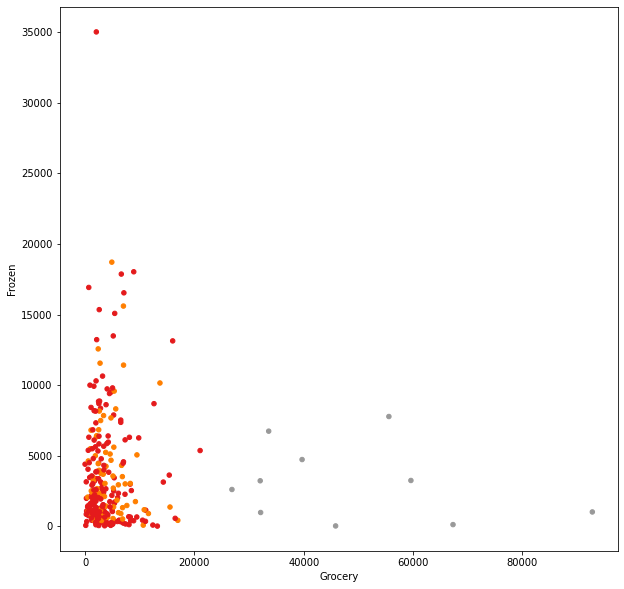

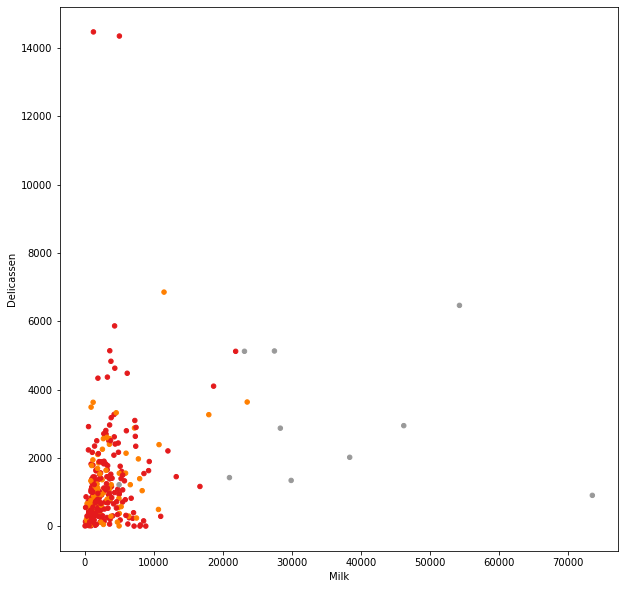

In [47]:
ndf.plot(kind='scatter', x = 'Grocery', y='Frozen',
       c = 'cluster', cmap = 'Set1',
       colorbar = False, figsize = (10,10))

ndf.plot(kind='scatter', x = 'Milk', y='Delicassen',
       c = 'cluster', cmap = 'Set1',
       colorbar = False, figsize = (10,10))

# 실습3

In [48]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### 데이터 호출

In [50]:
iris = pd.read_csv('iris.csv')

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
# 2개의 컬럼만 사용
irisDF = iris[['Sepal.Length','Petal.Length']]
irisDF.head()

,Sepal.Length,Petal.Length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


 ## 비 계층적 군집 분석

In [58]:
model = KMeans(n_clusters=3, random_state=0,
              algorithm='auto')
model.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [59]:
perd = model.predict(irisDF)
perd

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

### 클러스터링 시각화

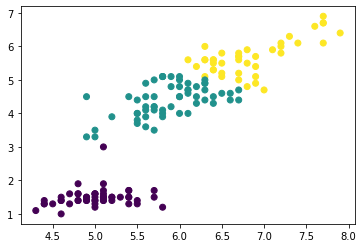

In [60]:
plt.scatter(x=irisDF['Sepal.Length'], y=irisDF['Petal.Length'],
           c=perd)

#### 군집별 중앙값 확인

In [61]:
centers = model.cluster_centers_
centers

array([[5.00784314, 1.49215686],
       [5.87413793, 4.39310345],
       [6.83902439, 5.67804878]])

#### 중앙값만 시각화

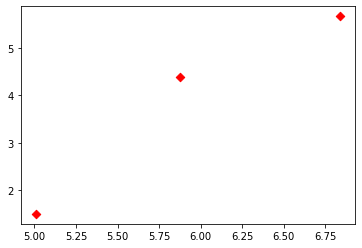

In [70]:
plt.scatter(x=centers[:,0], y=centers[:,1],
           marker='D', c='r')
plt.show()

#### 군집결과 & 중앙점 시각화

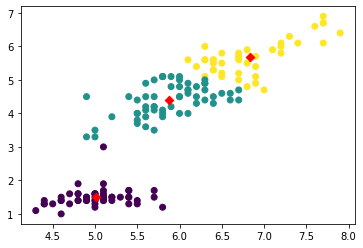

In [71]:
plt.scatter(x=irisDF['Sepal.Length'], y=irisDF['Petal.Length'],
           c=perd)
plt.scatter(x=centers[:,0], y=centers[:,1],
           marker='D', c='r')
plt.show()

# 실습 4 : testSet.txt 파일 사용

In [72]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

#### dataset 함수 생성 : 전체 80행

In [86]:
def loadDataSet(fileName):
    rows = []
    f = open(fileName, mode = 'r')
    
    lines = f.readlines() # 줄단위로 전체 행읽기
    
    for row in lines :
        line = row.split('\t') # TAB 기호로 컬럼을 구분한다.
        row = []
        for i in line:
            row.append(float(i))
        rows.append(row)
        
    return np.array(rows) # 2차원 배열로 (80,2)

#### 함수호출

In [88]:
dataset = loadDataSet('testSet.txt')

dataset.shape

(80, 2)

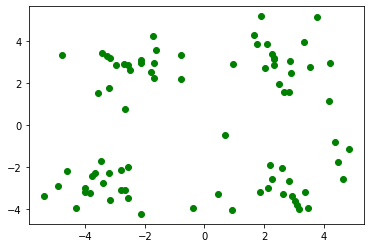

In [90]:
# 0 : 첫번째열의 모든값
# 1 : 두번째열의 모든값
# go : 색상은 green, 마커는 'o'
plt.plot(dataset[:, 0], dataset[:, 1], 'go')
plt.show()

In [91]:
dataDF = pd.DataFrame(dataset, columns=['x','y'])
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       80 non-null     float64
 1   y       80 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


### 모델링

In [92]:
model = KMeans(n_clusters=4,
              algorithm='auto')
model.fit(dataDF)

KMeans(n_clusters=4)

#### k-means 예측값 확인

In [94]:
pred = model. predict(dataDF)

# 0~3 까지 4개의 그룹
pred

array([0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2,
       3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1,
       0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2,
       3, 1, 0, 2, 3, 1, 0, 2, 3, 1, 0, 2, 3, 1])

### 시각화

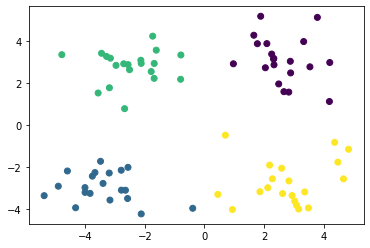

In [95]:
plt.scatter(x=dataDF['x'], y=dataDF['y'], c=pred)

#### 중앙점 찾기

In [96]:
centers = model.cluster_centers_
centers

array([[ 2.6265299 ,  3.10868015],
       [-3.38237045, -2.9473363 ],
       [-2.46154315,  2.78737555],
       [ 2.80293085, -2.7315146 ]])

#### 중앙점 시각화

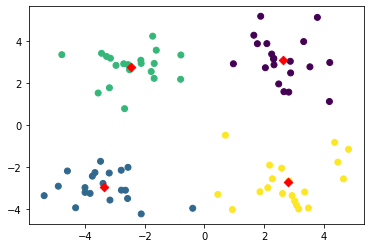

In [99]:
plt.scatter(x=dataDF['x'], y=dataDF['y'], c=pred)
plt.scatter(x=centers[:,0], y=centers[:,1], c='red', marker='D')

In [100]:
dataDF['cluster'] = pred
dataDF.head()

,x,y,cluster
0,1.658985,4.285136,0
1,-3.453687,3.424321,2
2,4.838138,-1.151539,3
3,-5.379713,-3.362104,1
4,0.972564,2.924086,0


### --------------------------------------------

# 계층적 군집구조

In [101]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

In [106]:
# 내장 데이터셋은 data와 target으로 구분되어있다.
labels = pd.DataFrame(iris.target)

labels.columns = ['labels']

data = pd.DataFrame(iris.data)
data.columns = ['Sepal Length','Sepal width','Petal Length','Petal width']

data = pd.concat([data, labels], axis =1)

In [107]:
# 댄드로그램 생성

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [110]:
mergings = linkage(data, method='complete')

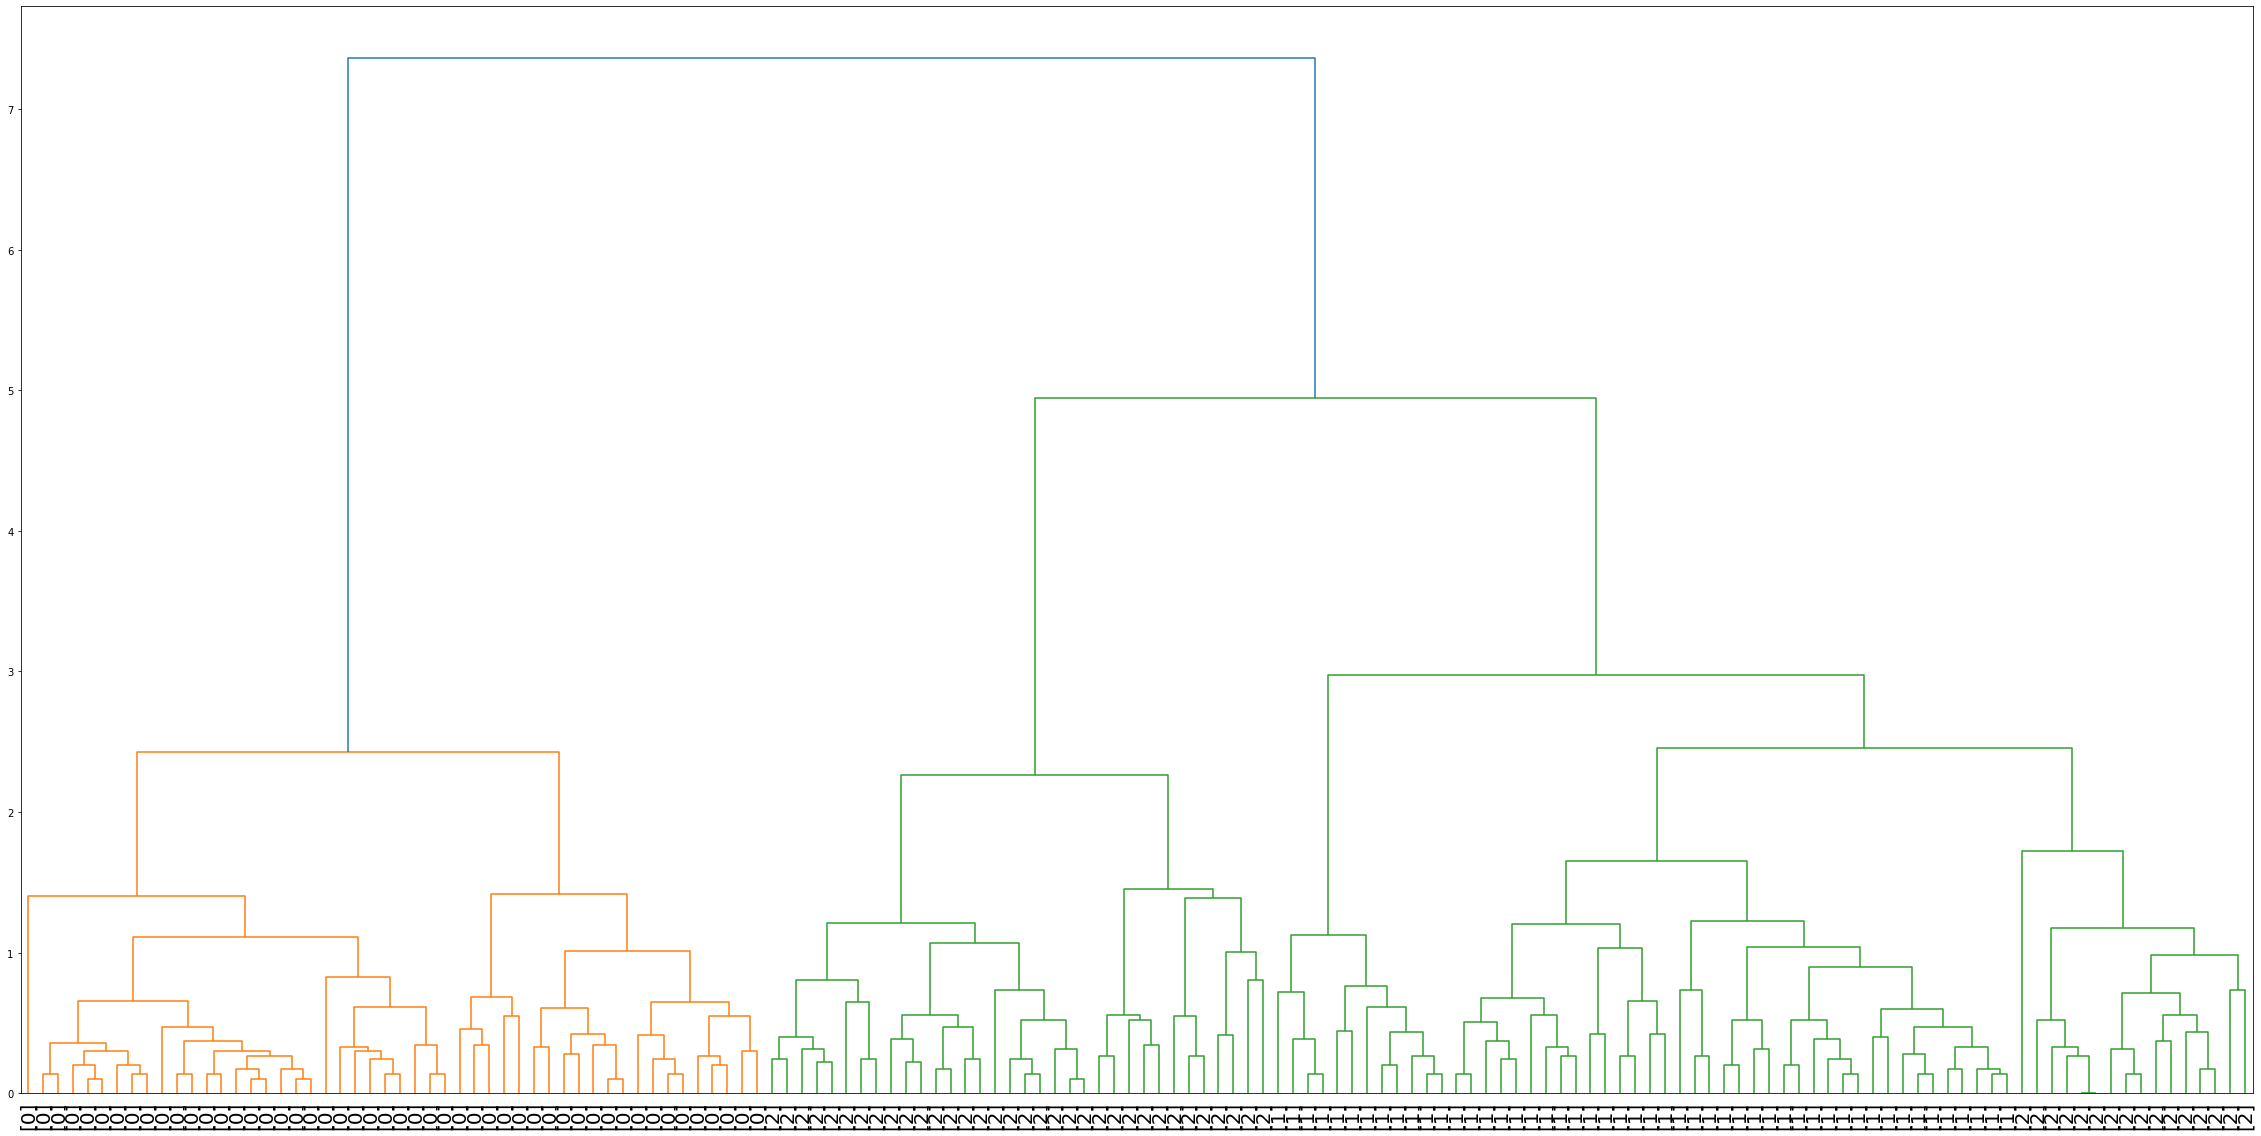

In [112]:
plt.figure(figsize=(40,20))

dendrogram(mergings,
          labels = labels.values,
          leaf_rotation = 90,
          leaf_font_size = 20)
plt.show()